# Datasets 
- first we will need to choose the appropiate datsets to use 
- it seems reasonable to do FashionMNIST and CIFAR-10
  

MNIST dataset

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

# This will download the dataset for you
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',    # folder to store the dataset
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.FashionMNIST(
    root='data\processed\FASHION_MNIST',
    train=True,
    download=True,
    transform=transform
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='data\processed\FASHION_MNIST',
    train=False,
    download=True,
    transform=transform
)

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\timgr\AppData\Local\Temp\ipykernel_10684\1997058576.py:6: SyntaxWarning: invalid escape sequence '\p'
  root='data\processed\FASHION_MNIST',
C:\Users\timgr\AppData\Local\Temp\ipykernel_10684\1997058576.py:12: SyntaxWarning: invalid escape sequence '\p'
  root='data\processed\FASHION_MNIST',


In [4]:
print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

Train dataset size: 60000
Test dataset size: 10000


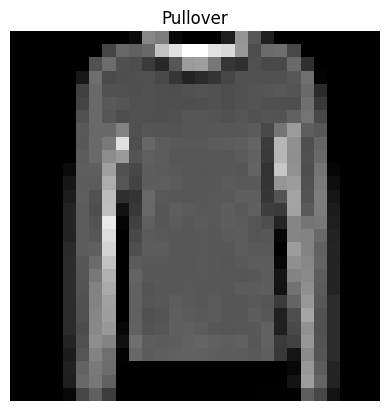

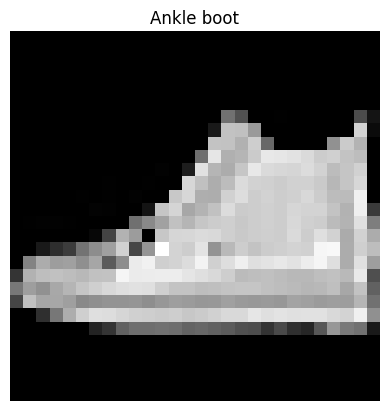

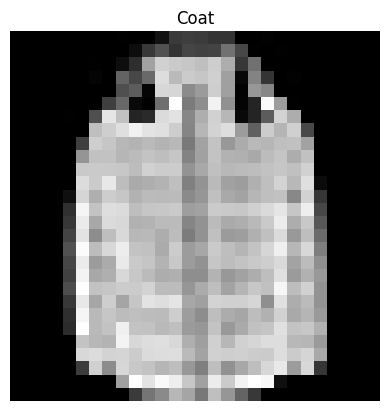

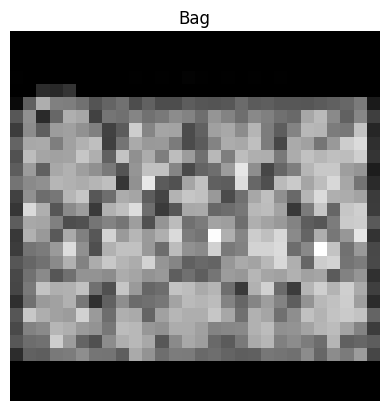

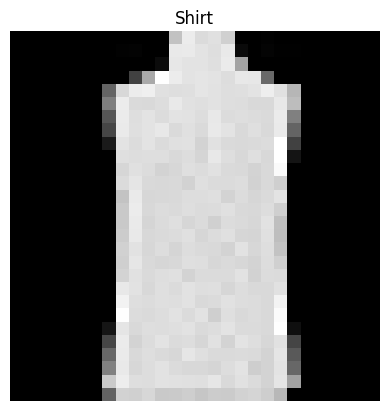

In [5]:
#lets have a look at some images
fashion_labels = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat', 
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot'
]

def show_image(img_tensor, label):
    # img_tensor is [1, 28, 28] shape from FashionMNIST
    # convert to (28, 28) for plotting
    img_np = img_tensor.numpy().squeeze()
    plt.imshow(img_np, cmap='gray')
    plt.title(fashion_labels[label])
    plt.axis('off')
    plt.show()

#lets look at 5 random samples
for _ in range(5):
    idx = random.randint(0, len(train_dataset) - 1)
    img, label = train_dataset[idx]
    show_image(img, label)

To train a model we flatten the 28x28 images to a vector of raw pixels 

In [6]:
def dataset_to_numpy(dataset, max_samples=None):
    """
    Convert a PyTorch dataset of (image, label) pairs
    to (X, y) NumPy arrays.
    - X.shape = (N, 784)
    - y.shape = (N,)
    """
    X_list = []
    y_list = []
    count = 0
    
    for img, label in dataset:
        # img: [1, 28, 28], convert to [28, 28]
        img_np = img.numpy().squeeze()
        # Flatten to 784
        img_flat = img_np.flatten()
        
        X_list.append(img_flat)
        y_list.append(label)
        
        count += 1
        if max_samples is not None and count >= max_samples:
            break
    
    X = np.stack(X_list, axis=0)
    y = np.array(y_list)
    return X, y

In [7]:
X_train_np, y_train_np = dataset_to_numpy(train_dataset)
X_test_np, y_test_np = dataset_to_numpy(test_dataset, max_samples=None)

## Train a shallow logistic regression model

In [8]:
lr_model = LogisticRegression(
    max_iter=1000,  
    solver='lbfgs',
    verbose=1
)

lr_model.fit(X_train_np, y_train_np)

# Evaluate on test
y_pred_lr = lr_model.predict(X_test_np)
acc_lr = accuracy_score(y_test_np, y_pred_lr)

print("Logistic Regression Test Accuracy:", acc_lr)

Logistic Regression Test Accuracy: 0.8435


In [9]:
def plot_confusion_matrix(y_true, y_pred, classes, title="Confusion Matrix"):
    """
    Plots a confusion matrix using seaborn's heatmap.
    
    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        classes (list of str): Class names for the axes.
        title (str): Title for the plot.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, 
        annot=True,       # show numbers in each cell
        fmt='d',          # integer format
        cmap='Blues',     # color map
        xticklabels=classes, 
        yticklabels=classes
    )
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

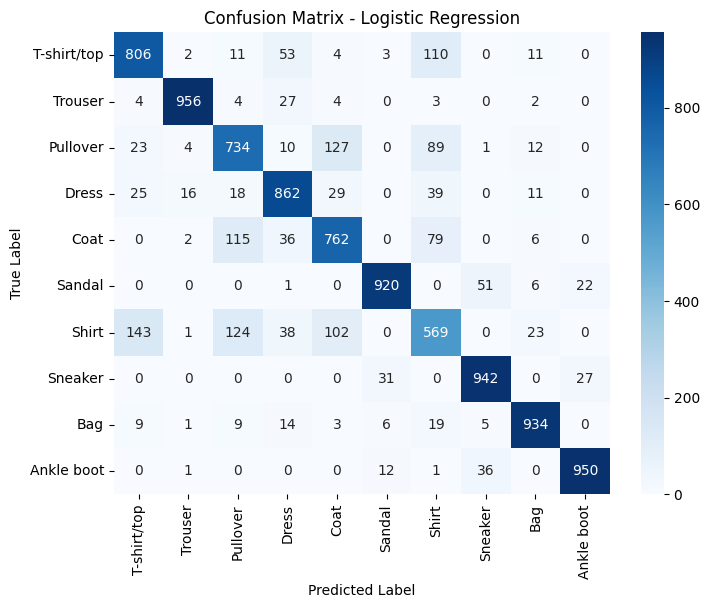

In [10]:
plot_confusion_matrix(
    y_true=y_test_np, 
    y_pred=y_pred_lr, 
    classes=fashion_labels, 
    title="Confusion Matrix - Logistic Regression"
)


In [11]:
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_np, y_pred_lr, target_names=fashion_labels))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.72      0.73      0.73      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.95      0.92      0.93      1000
       Shirt       0.63      0.57      0.60      1000
     Sneaker       0.91      0.94      0.93      1000
         Bag       0.93      0.93      0.93      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# lets build a simple fully connected NN 

In [12]:
import tensorflow as tf
from tensorflow import keras

standardize data with standard scaling before feeding it into the NN 


In [13]:
mean = np.mean(X_train_np)
std = np.std(X_train_np)

X_train = (X_train_np - mean) / std
X_test = (X_test_np - mean) / std

as the fully connected nn expects 1d arrays, we will need to flatten our data 

In [14]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

In [17]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(28*28,)), #flattened image      
    layers.Dense(128, activation='relu'), #hidden layer with 128 units
    layers.Dense(64, activation='relu'), #hidden layer with 64 units
    layers.Dense(10, activation='softmax')  #output for 10 classes
])

model.compile(
    loss='sparse_categorical_crossentropy', #multiclass classification
    optimizer='sgd', #stochastic gradien descent
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#train model now 
history = model.fit(
    X_train, y_train_np,
    epochs=15,             
    batch_size=64,        
    validation_split=0.1  
)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7052 - loss: 0.8941 - val_accuracy: 0.8248 - val_loss: 0.4827
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.4677 - val_accuracy: 0.8492 - val_loss: 0.4222
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8512 - loss: 0.4212 - val_accuracy: 0.8547 - val_loss: 0.3982
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8622 - loss: 0.3864 - val_accuracy: 0.8598 - val_loss: 0.3897
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8684 - loss: 0.3710 - val_accuracy: 0.8645 - val_loss: 0.3689
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8716 - loss: 0.3564 - val_accuracy: 0.8668 - val_loss: 0.3602
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8781 - loss: 0.3405 - val_accuracy: 0.8707 - val_loss: 0.3636
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8852 - loss: 0.3232 - val_accuracy: 0.

In [19]:
#predict on test set
y_probs = model.predict(X_test)          
y_pred  = np.argmax(y_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


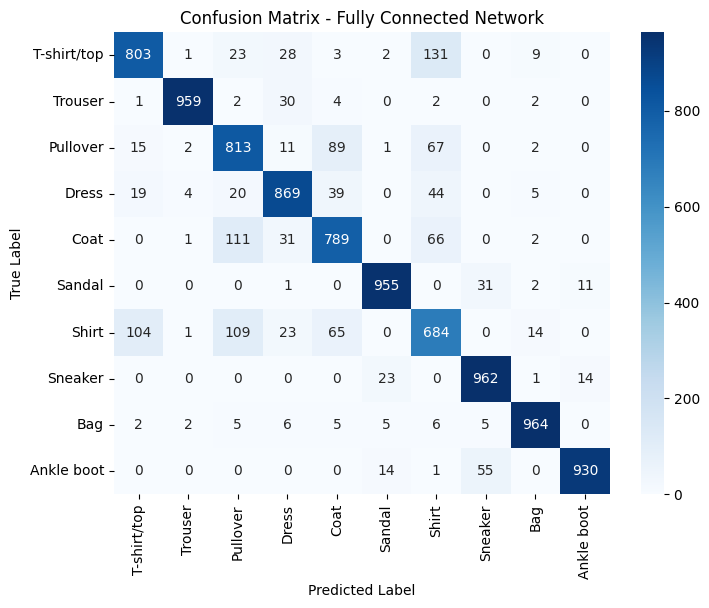

Test Accuracy: 0.8728
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.85      0.80      0.83      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.75      0.81      0.78      1000
       Dress       0.87      0.87      0.87      1000
        Coat       0.79      0.79      0.79      1000
      Sandal       0.95      0.95      0.95      1000
       Shirt       0.68      0.68      0.68      1000
     Sneaker       0.91      0.96      0.94      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [20]:
plot_confusion_matrix(
    y_true=y_test_np, 
    y_pred=y_pred, 
    classes=fashion_labels, 
    title="Confusion Matrix - Fully Connected Network"
)

loss, acc = model.evaluate(X_test, y_test_np, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

print("Classification Report:\n", classification_report(y_test_np, y_pred, target_names=fashion_labels))


# Lets do the same with a CNN 

here we need to do some more preprocessing as the CNN expects a 4D tensor (N, height, width, channels)
as we only have grayscale images, channels = 1 

In [21]:
X_train = X_train.reshape((X_train_np.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test_np.shape[0], 28, 28, 1))

print("Reshaped X_train shape:", X_train.shape)

Reshaped X_train shape: (60000, 28, 28, 1)


In [22]:
#scale to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


In [23]:
model_cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  #output for 10 classes
])

model_cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_cnn.summary()

C:\Users\timgr\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [25]:
history = model_cnn.fit(
    X_train, y_train_np,
    epochs=5,         # start with 5, can increase
    batch_size=64,    # typical mini-batch size
    validation_split=0.1,  # keep 10% for validation
    verbose=1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5559 - loss: 1.2466 - val_accuracy: 0.7460 - val_loss: 0.6501
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7588 - loss: 0.6360 - val_accuracy: 0.7980 - val_loss: 0.5451
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7952 - loss: 0.5456 - val_accuracy: 0.8160 - val_loss: 0.4917
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8196 - loss: 0.4879 - val_accuracy: 0.8205 - val_loss: 0.4757
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8285 - loss: 0.4658 - val_accuracy: 0.8362 - val_loss: 0.4411


In [29]:
y_probs = model_cnn.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


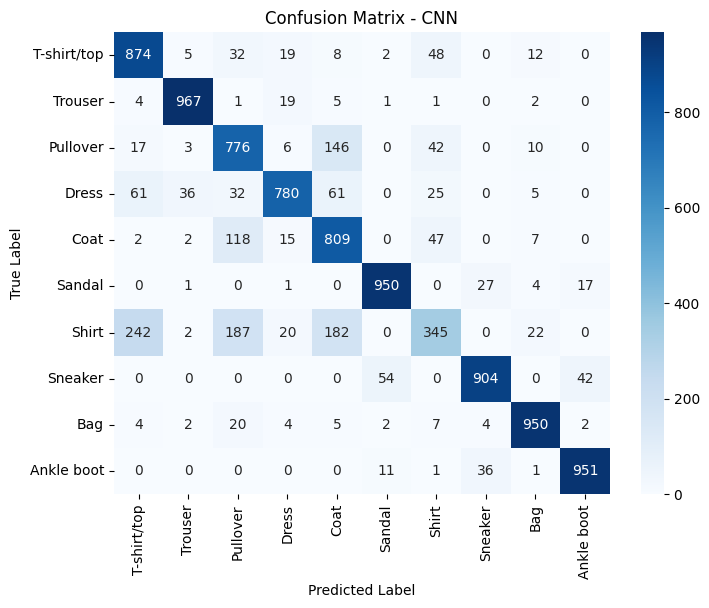

Test accuracy: 0.8306
Classification Report (CNN):
              precision    recall  f1-score   support

 T-shirt/top       0.73      0.87      0.79      1000
     Trouser       0.95      0.97      0.96      1000
    Pullover       0.67      0.78      0.72      1000
       Dress       0.90      0.78      0.84      1000
        Coat       0.67      0.81      0.73      1000
      Sandal       0.93      0.95      0.94      1000
       Shirt       0.67      0.34      0.46      1000
     Sneaker       0.93      0.90      0.92      1000
         Bag       0.94      0.95      0.94      1000
  Ankle boot       0.94      0.95      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



In [30]:
plot_confusion_matrix(
    y_true=y_test_np, 
    y_pred=y_pred, 
    classes=fashion_labels, 
    title="Confusion Matrix - CNN"
)


test_loss, test_acc = model_cnn.evaluate(X_test, y_test_np, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

print("Classification Report (CNN):")
print(classification_report(y_test_np, y_pred, target_names=fashion_labels))